# Modelo de regrecion lineal simple


---



In [2]:
#importamos libreria
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
#importamos data set
ds=pd.read_csv("Salary_Data.csv")

## Dataset y Descripción del problema de la sección
encontraremos en csv el cual se llama `salary_data` donde la primera tenemos años de experiencia y en la segunsda columna tenemos el sueldo que gana el empleado la idea es que intentaremos **predecir y crear un modelo lineal** lo que llamamos regresion lineal simple el cual se bas en buscar todas las rectas posibles cual es la mejor que se ajusta a estos datos

este aunque simple nos sirve para muchas cosas, por ejemplo 

* se se pa en un momento dado cuando tiene un empleado que llegue a la empresa con cierto años de experiencia, cual seria su sueldo inicial
* tambien para mejorar la competitividad
* proyectar, predecir años futuros en este caso cuanto deberia ganar alguien con 12 años de expriencia o 15 o 20 y mas!

En este caso tomaremos las siguentes variables

Independientes 
* años de experiencia

Dependientes
* salario

y el modelo nos va a devolver, predecir usando una ecuacion lineal el sueldo esperado




In [3]:
ds

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Idea de la Regresión Lineal Simple 

Pare entender ello debemos entender Varios conceptos
### Variables
* Categorica 
 * Nominales: son aquellas  que establecen una serie de etiquetas y que no tienen un tipo de orden \\
 Hombre,Mujer \\
 Rojo, verde, azul
 * Ordinales: existe cierto orden \\
  Tallas de ropa: S, M, L \\
  Notas en EU: A, B, C, D, E, F 

* Numericas
  * Discretas: objetos que podemos contabilizar, conectar sin nesecidad de emplear numeros decimales \\
  Empleados: 1, 2, 3 \\
  Personas en fiesta: 589
  * Continuas: Estos valores pueden tomar numeros decimales \\
  Peso: 65.78 kg \\
  Estatura: 1.89 m

### Regresiones
En estadistica se llama analisis de la regrecion al proceso estadistico de estimar las relaciones que existen entre variables
Se centra em estudiar las relaciones entre una variable dependiente de una o mas variables independientes

* Lineal
  * Regresion lineal simple
  * Regresion lineal multiple
* Logistica
  * Regresion logistica simple
  * Regresion logistica multiple

### Que es una regresion lineal simple 
es aquel que tiene una variable independiente y una dependiente \\
$y=(b_{0}+b_{1})x_{1}$ \\
siendo
$y$ la variable que debemos predecir, la variable dependiente $x_1$ la variable independeinte, $b_1$ siendo la pendiente de la recta y es el coeficiente del modelo de regresion lineal y $b_0$ indica el valor inicial que toma la variable independiente cuando la variable independiente es 0 y es su constante
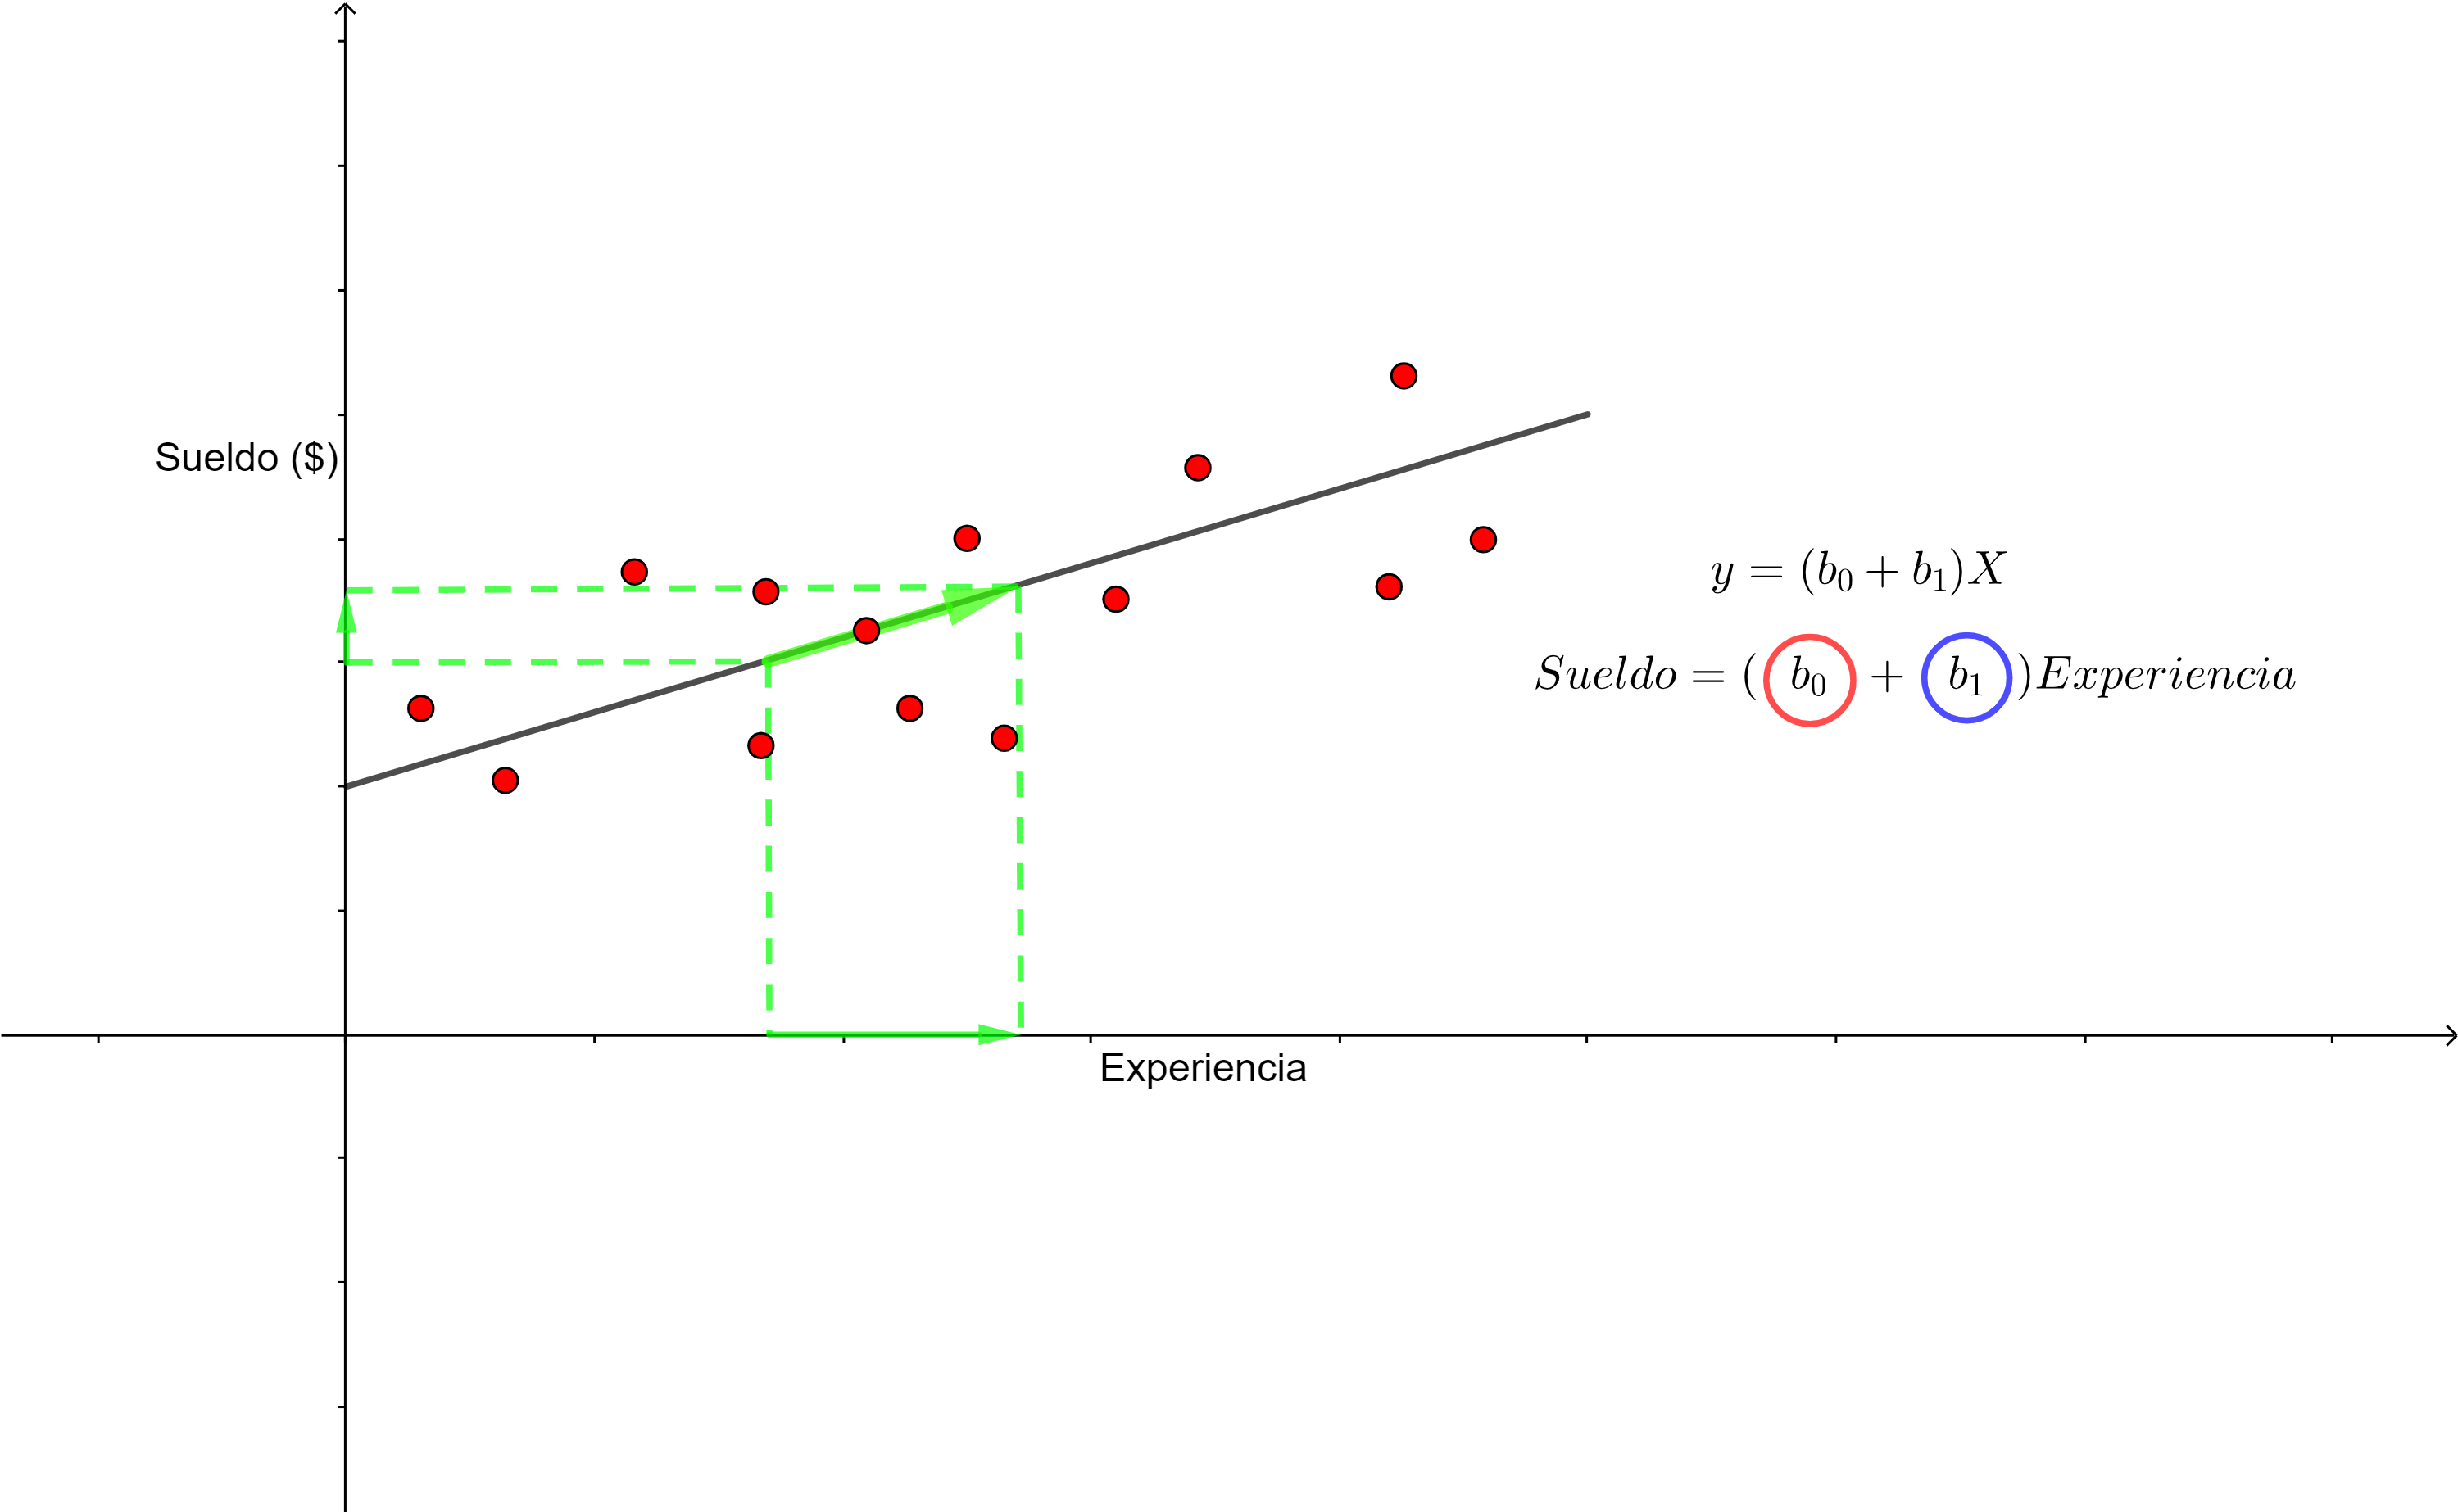







## Comenzemos a programar
Ya tenemos las librerias y el dataset, y ademas viendo de que no hay ningun NaN, no nesecitamos de variables dummys en el ds simplemente haremos el preprocesamiento del dataset aplicando la asignacion de variables dependientes e independientes y el conjunto de entrenamiento y testing

Cabe resaltar que no nesecitamos de escalado porque automaticamente el modelo funcionara correctamente y como solo hay una sola variable no hay problemas en que una de las variables dominara al resto

### Limpieza de datos

In [4]:
#reasignamos el data set a su variable 
ds=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning de A a la Z: Python para Data Science/Seccion 4 Regresion lineal simple/Salary_Data.csv")

#asignamos variables independientes y dependeintes

#variable independiente
X = ds.iloc[:, :-1].values
#en este caso definimos que queremos todas las filas y queremos las columnas salvo la ultima y solo los valores sin etiqueta de id
X

OSError: [Errno 22] Invalid argument: '/content/drive/MyDrive/Colab Notebooks/Machine Learning de A a la Z: Python para Data Science/Seccion 4 Regresion lineal simple/Salary_Data.csv'

In [ ]:
#variable dependiente
y = ds.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Entrenamiento del modelo

dividiremos el conjunto de entrenaminto y testing

en este caso como tenemos 30 individuos usaremos 20 para entrenar y 10 de test

se sale de los margenes de 80-10 y 70-30 pero en este caso no hay problema porque es un modelo de regresion lineal simple y lo haremos para que queden numeros enteros

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=0) 
#aqui indicaremos que 1 de cada 3 individuos sea para testing

Crearemos la fase de entrenaminto del modelo de regresion lineal simple

importamos la libreria `from sklearn.linear_model import LinearRegression`

`sklearn.linear_model` es la sublibreria de `sklearn` para modelos lineales

`LinearRegression` es para regresiones lineales simples o multiples en este caso nos importa las simples


---


`regresion = LinearRegression()` como es una regresion lineal simple no hay que especificar nada para que lo haga

`regresion.fit(X_train,y_train)` sirve para ajustar creando el modelo de regresion lineal

**importante: deben tener el mismo tamaño, es decir el mismo num. de filas**

en caso de big data debemos distribuir la tarea entre multimples procesadores usando el parametro `n_jobs=x` en `LinearRegression()` siendo `x` el numero de procesadores asignados

tambien podemos usar el parametro `normalize=n` en `LinearRegression()` para que los datos automaticamente se escalen de manera normalizada siendo `n` un valor booleano el cual `true` indica que lo escalaremos y `false` no escalaremos

In [ ]:
from sklearn.linear_model import LinearRegression

regresion = LinearRegression()
regresion.fit(X_train,y_train)

LinearRegression()

### Testing de modelo (prediccion)

crearemos un vector de datos de los valores de la prediccion que contendra la prediccion elaborada por el modelo de regrecion lineal

`y_pred = regresion.predict(X_test)`

para obtener la variable dependeinte que se predicara usaremos `.predict(X_test)` que en este caso solo sera la variable independiente `X_test` que es los años, y con ello nos devolvera una prediccion de el sueldo que debe tener

es decir solo usaremos `X_test` ya que el modelo lo que hace es tomar las variables independientes para predecir las variables dependientes

In [ ]:
y_pred = regresion.predict(X_test)



Tomado ello podemos comparar las variables dependientes que fueron predichas con las variables dependientes que se separon para test

In [ ]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [ ]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

### Visualizacion de datos
Lo que haremos para visualizar en una nube de puntos/dispersion (scatter plot) lo cual tiende a ver donde se concentra `y`

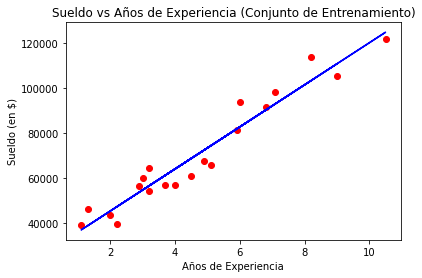

In [ ]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regresion.predict(X_train), color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()

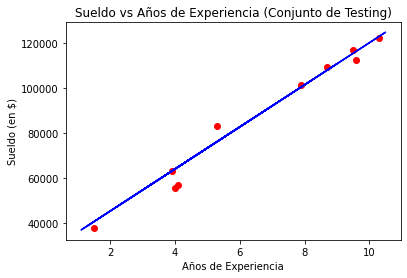

In [ ]:
#haremos la nube de dispercion de y_train
plt.scatter(X_test, y_test, color = "red")
#eligiremos nuestro eje x X_train y el eje y y_train con el color rojo
#haremos la recta de regresion lineal con la prediccion
plt.plot(X_train, regresion.predict(X_train), color = "blue")
#eligiremos nuestro eje x X_train y el eje y con su prediccion con el color azul
plt.title("Sueldo vs Años de Experiencia (Conjunto de Testing)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()